# Import dan Download library

In [70]:
!pip install gdown

In [71]:
!gdown --folder 1gx29Vv3dXbBGJXghJ8yUOf3lSE1zmrIF?usp=sharing

Retrieving folder contents
Processing file 1wer-dyT_gWN10o-XSzHx0ugwawBmJGV2 Jumlah Sekolah, Guru, dan Murid Sekolah Menengah Atas (SMA) di Bawah Kementerian Pendidikan, Kebudayaan, Riset, dan Teknologi Menurut Kabupaten_Kota di Provinsi Jawa Timur, 2021_2022.csv
Processing file 17dSNWR6tqQQfyhF6FYX2VMY6CybpQcZq rapor-publik-an-2021-peserta-didik-sma.xlsx
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1wer-dyT_gWN10o-XSzHx0ugwawBmJGV2
To: /content/Datawrang/Jumlah Sekolah, Guru, dan Murid Sekolah Menengah Atas (SMA) di Bawah Kementerian Pendidikan, Kebudayaan, Riset, dan Teknologi Menurut Kabupaten_Kota di Provinsi Jawa Timur, 2021_2022.csv
100% 2.10k/2.10k [00:00<00:00, 6.37MB/s]
Downloading...
From: https://drive.google.com/uc?id=17dSNWR6tqQQfyhF6FYX2VMY6CybpQcZq
To: /content/Datawrang/rapor-publik-an-2021-peserta-didik-sma.xlsx
100% 26.3M/26.3M [00:00<00:00, 76.1MB/s]
Downlo

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [73]:
df_2021 = pd.read_excel('/content/Datawrang/rapor-publik-an-2021-peserta-didik-sma.xlsx',sheet_name=1)
df_jumlah= pd.read_csv("/content/Datawrang/Jumlah Sekolah, Guru, dan Murid Sekolah Menengah Atas (SMA) di Bawah Kementerian Pendidikan, Kebudayaan, Riset, dan Teknologi Menurut Kabupaten_Kota di Provinsi Jawa Timur, 2021_2022.csv")

Data cleaning

In [74]:
df_full = df_2021[["kd_kokab","jenis_wilayah","LIT","NUM"]]
df_full.head()

,kd_kokab,jenis_wilayah,LIT,NUM
0,KAB. PENAJAM PASER UTARA,KABUPATEN,49.660599,38.158300
1,KAB. PENAJAM PASER UTARA,KABUPATEN,55.161700,53.661399
2,KAB. PENAJAM PASER UTARA,KABUPATEN,66.163900,57.495500
3,KAB. PENAJAM PASER UTARA,KABUPATEN,79.499900,50.494100
4,KAB. PENAJAM PASER UTARA,KABUPATEN,65.830500,54.328201


In [75]:
df_full = df_2021[["kd_kokab","jenis_wilayah","LIT","NUM"]]

df_full = df_full.dropna()

kabupaten_kota_filter = [
    "KAB. PACITAN", "KAB. PONOROGO", "KAB. TRENGGALEK", "KAB. TULUNGAGUNG",
    "KAB. BLITAR", "KAB. KEDIRI", "KAB. MALANG", "KAB. LUMAJANG",
    "KAB. JEMBER", "KAB. BANYUWANGI", "KAB. BONDOWOSO", "KAB. SITUBONDO",
    "KAB. PROBOLINGGO", "KAB. PASURUAN", "KAB. SIDOARJO", "KAB. MOJOKERTO",
    "KAB. JOMBANG", "KAB. NGANJUK", "KAB. MADIUN", "KAB. MAGETAN",
    "KAB. NGAWI", "KAB. BOJONEGORO", "KAB. TUBAN", "KAB. LAMONGAN",
    "KAB. GRESIK", "KAB. BANGKALAN", "KAB. SAMPANG", "KAB. PAMEKASAN",
    "KAB. SUMENEP", "KOTA KEDIRI", "KOTA BLITAR", "KOTA MALANG",
    "KOTA PROBOLINGGO", "KOTA PASURUAN", "KOTA MOJOKERTO", "KOTA MADIUN",
    "KOTA SURABAYA", "KOTA BATU"
]

df_filtered = df_full[df_full['kd_kokab'].isin(kabupaten_kota_filter)]
df_full = df_filtered.copy().reset_index(drop=True)
print(df_full['kd_kokab'].unique())

['KAB. PASURUAN' 'KAB. GRESIK' 'KAB. PROBOLINGGO' 'KAB. SUMENEP'
 'KAB. LUMAJANG' 'KOTA PROBOLINGGO' 'KAB. SIDOARJO' 'KAB. BOJONEGORO'
 'KAB. SITUBONDO' 'KAB. PAMEKASAN' 'KAB. JOMBANG' 'KAB. TUBAN'
 'KAB. MALANG' 'KAB. KEDIRI' 'KOTA SURABAYA' 'KOTA MADIUN' 'KAB. SAMPANG'
 'KAB. NGANJUK' 'KAB. BONDOWOSO' 'KAB. PACITAN' 'KAB. TRENGGALEK'
 'KAB. LAMONGAN' 'KAB. JEMBER']


In [76]:
def clean_kabupaten(name):
    name = name.strip()
    if name.upper().startswith("KAB. "):
        name = name[4:].strip()
    return name.title()

df_full['kd_kokab'] = df_full['kd_kokab'].apply(clean_kabupaten)

In [77]:
df_full

,kd_kokab,jenis_wilayah,LIT,NUM
0,Pasuruan,KABUPATEN,69.831300,57.995599
1,Pasuruan,KABUPATEN,50.327400,48.660400
2,Pasuruan,KABUPATEN,76.666000,56.662000
3,Pasuruan,KABUPATEN,81.333600,43.492699
4,Pasuruan,KABUPATEN,69.998000,54.494900
...,...,...,...,...
2012,Sumenep,KABUPATEN,49.327199,45.993200
2013,Sumenep,KABUPATEN,64.496900,47.993601
2014,Sumenep,KABUPATEN,36.157898,46.493300
2015,Sumenep,KABUPATEN,45.326401,43.159299


In [78]:
df_full.isna().sum()

,0
kd_kokab,0
jenis_wilayah,0
LIT,0
NUM,0


In [79]:
df_jumlah

,Kabupaten/Kota,Jumlah Sekolah SMA (Negeri),Jumlah Sekolah SMA (Swasta),Jumlah Sekolah SMA (Negeri+Swasta),Jumlah Guru SMA (Negeri),Jumlah Guru SMA (Swasta),Jumlah Guru SMA (Negeri+Swasta),Jumlah Murid SMA (Negeri),Jumlah Murid SMA (Swasta),Jumlah Murid SMA (Negeri+Swasta)
0,Pacitan,8,2,10,257,26,283,3564,118,3682
1,Ponorogo,16,10,26,586,149,735,8806,1770,10576
2,Trenggalek,12,4,16,411,45,456,7286,422,7708
3,Tulungagung,11,13,24,606,189,795,11831,2067,13898
4,Blitar,7,15,22,372,144,516,7606,1309,8915
5,Kediri,14,13,27,699,143,842,14339,1855,16194
6,Malang,13,57,70,699,848,1547,12478,14350,26828
7,Lumajang,12,18,30,476,171,647,9390,1928,11318
8,Jember,18,44,62,786,573,1359,16959,9240,26199
9,Banyuwangi,17,33,50,798,450,1248,15165,5005,20170


# EDA


<Axes: xlabel='LIT', ylabel='kd_kokab'>

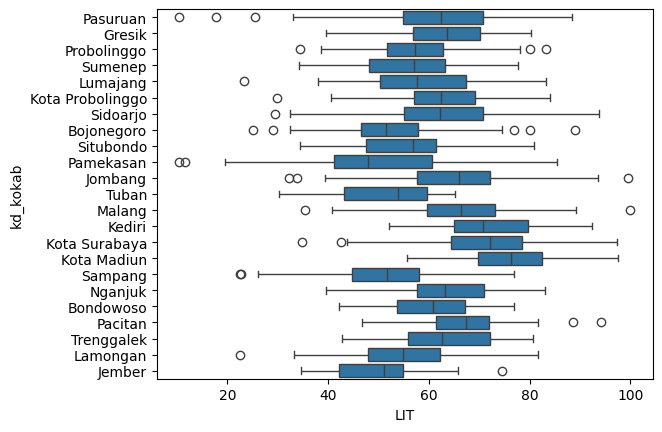

In [80]:
sns.boxplot(
    x = df_full['LIT'],
    y = df_full['kd_kokab']
)

<Axes: xlabel='NUM', ylabel='kd_kokab'>

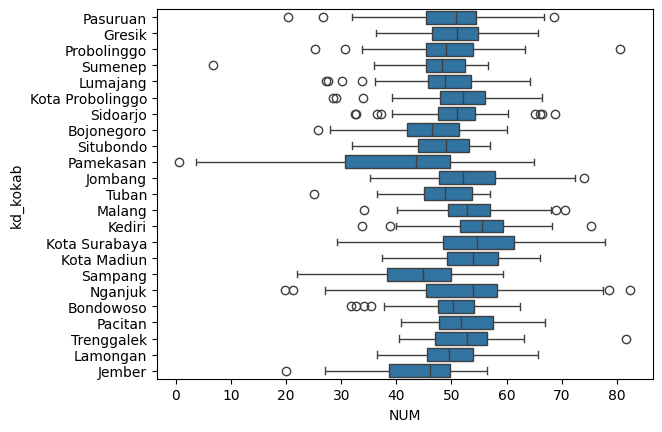

In [81]:
sns.boxplot(
    x = df_full['NUM'],
    y = df_full['kd_kokab']
)

In [122]:
df_full.describe()

,LIT,NUM
count,2017.000000,2017.000000
mean,61.781763,50.334666
std,12.824970,8.627037
min,10.486098,0.650796
25%,53.327999,45.826501
50%,62.163099,50.827500
75%,70.664800,55.661799
max,100.000000,82.462825


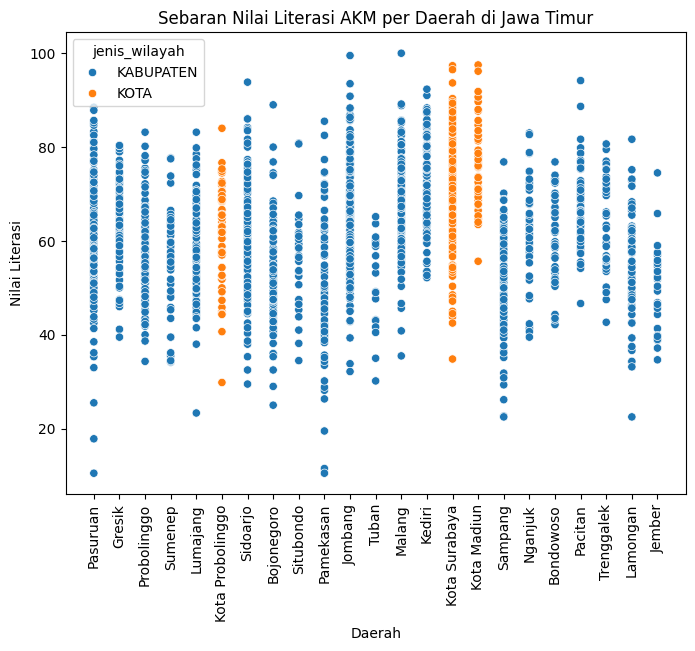

In [82]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_full, x='kd_kokab', y='LIT', hue='jenis_wilayah')
plt.title('Sebaran Nilai Literasi AKM per Daerah di Jawa Timur')
plt.xlabel('Daerah')
plt.ylabel('Nilai Literasi')
plt.xticks(rotation=90)
plt.show()


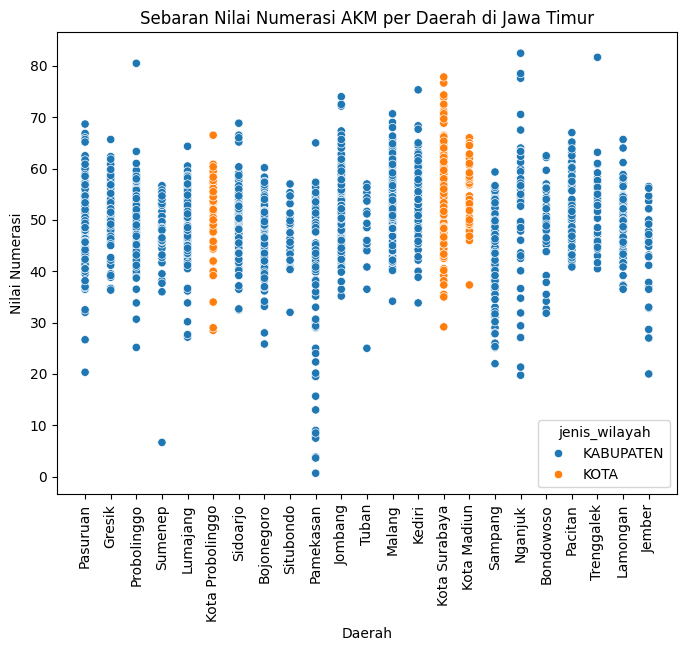

In [83]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_full, x='kd_kokab', y='NUM', hue='jenis_wilayah')
plt.title('Sebaran Nilai Numerasi AKM per Daerah di Jawa Timur')
plt.xlabel('Daerah')
plt.ylabel('Nilai Numerasi')
plt.xticks(rotation=90)
plt.show()


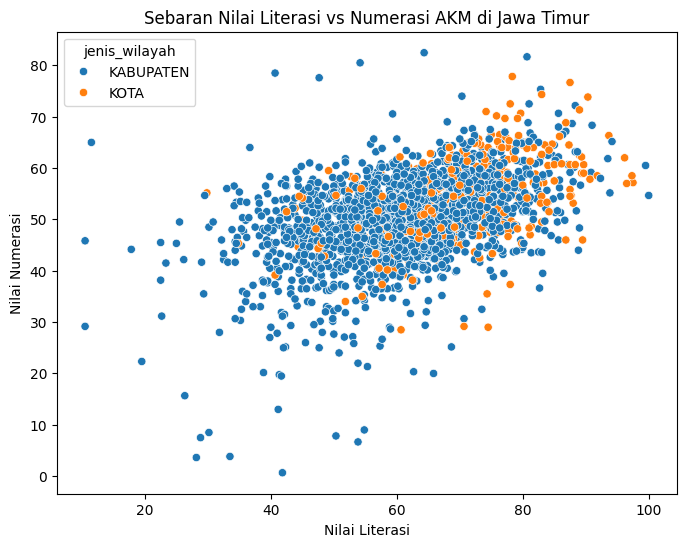

In [84]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_full, x='LIT', y='NUM', hue='jenis_wilayah')
plt.title('Sebaran Nilai Literasi vs Numerasi AKM di Jawa Timur')
plt.xlabel('Nilai Literasi')
plt.ylabel('Nilai Numerasi')
plt.show()


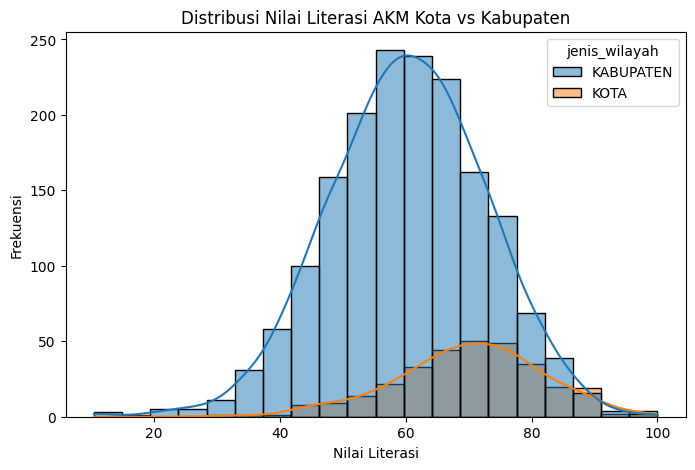

In [85]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_full, x='LIT', hue='jenis_wilayah', kde=True, bins=20)
plt.title('Distribusi Nilai Literasi AKM Kota vs Kabupaten')
plt.xlabel('Nilai Literasi')
plt.ylabel('Frekuensi')
plt.show()


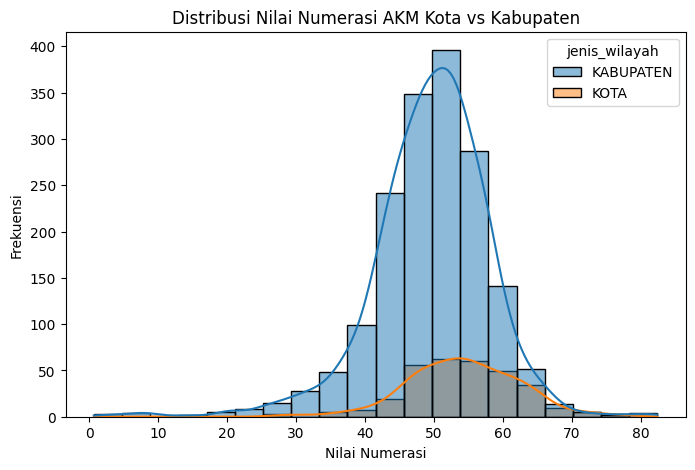

In [86]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_full, x='NUM', hue='jenis_wilayah', kde=True, bins=20)
plt.title('Distribusi Nilai Numerasi AKM Kota vs Kabupaten')
plt.xlabel('Nilai Numerasi')
plt.ylabel('Frekuensi')
plt.show()


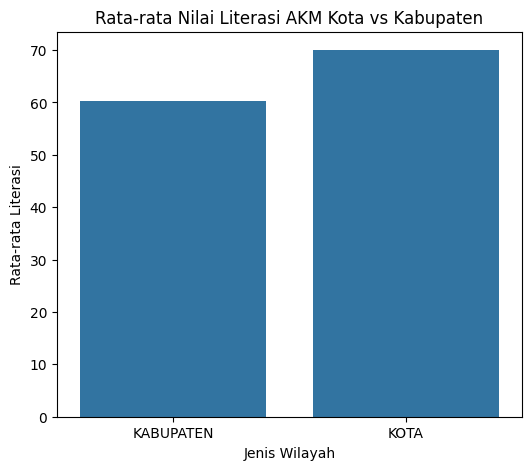

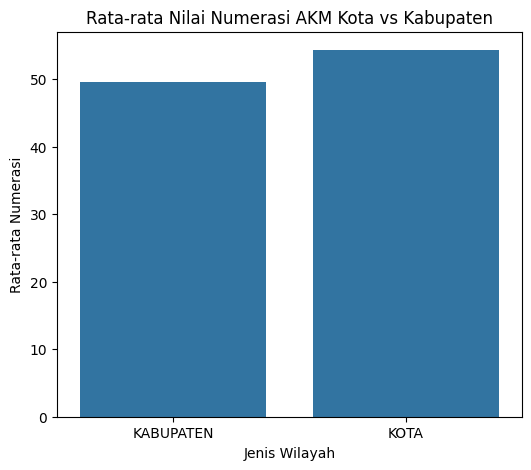

In [87]:
mean_df = df_full.groupby('jenis_wilayah')[['LIT','NUM']].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(data=mean_df, x='jenis_wilayah', y='LIT')
plt.title('Rata-rata Nilai Literasi AKM Kota vs Kabupaten')
plt.xlabel('Jenis Wilayah')
plt.ylabel('Rata-rata Literasi')
plt.show()

plt.figure(figsize=(6,5))
sns.barplot(data=mean_df, x='jenis_wilayah', y='NUM')
plt.title('Rata-rata Nilai Numerasi AKM Kota vs Kabupaten')
plt.xlabel('Jenis Wilayah')
plt.ylabel('Rata-rata Numerasi')
plt.show()


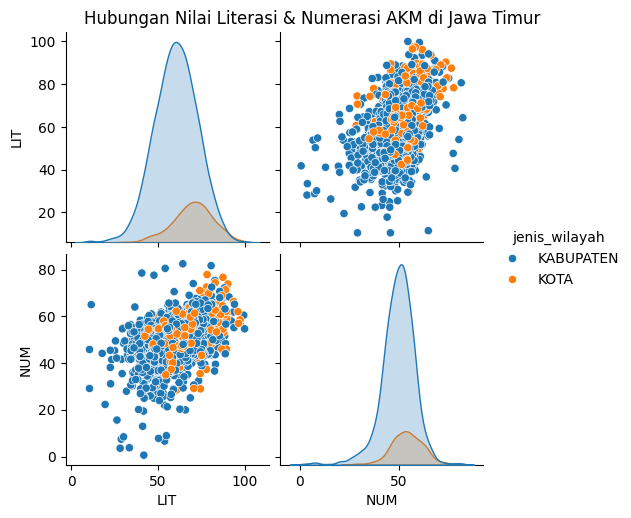

In [88]:
sns.pairplot(df_full[['LIT','NUM','jenis_wilayah']], hue='jenis_wilayah')
plt.suptitle('Hubungan Nilai Literasi & Numerasi AKM di Jawa Timur', y=1.02)
plt.show()


# Data Intergation

In [89]:
numeric = df_full.select_dtypes(include='number').columns
df_mean = df_full.groupby('kd_kokab')[numeric].mean().reset_index()
string = df_full.select_dtypes(exclude='number').columns
string = df_full[string].drop_duplicates(subset=['kd_kokab'])

df_mean = df_mean.merge(string, on='kd_kokab', how='left')


In [90]:
df_mean

,kd_kokab,LIT,NUM,jenis_wilayah
0,Bojonegoro,52.198522,46.464383,KABUPATEN
1,Bondowoso,60.416539,49.486323,KABUPATEN
2,Gresik,63.235964,50.410750,KABUPATEN
3,Jember,49.643930,43.859440,KABUPATEN
4,Jombang,65.683141,52.754220,KABUPATEN
5,Kediri,71.730147,55.125294,KABUPATEN
6,Kota Madiun,76.506709,54.639373,KOTA
7,Kota Probolinggo,61.944151,51.292767,KOTA
8,Kota Surabaya,71.235747,55.217544,KOTA
9,Lamongan,54.595797,49.599184,KABUPATEN


In [91]:
df_mean=df_mean.rename(columns={'kd_kokab': "Kabupaten/Kota"})

In [92]:
df_merge = pd.merge(df_mean,df_jumlah,on="Kabupaten/Kota",how="left")

In [93]:
df_merge.to_csv("Intergrasi kabupaten-kota Jawa Timur.csv", index=False)

In [94]:
df_merge

,Kabupaten/Kota,LIT,NUM,jenis_wilayah,Jumlah Sekolah SMA (Negeri),Jumlah Sekolah SMA (Swasta),Jumlah Sekolah SMA (Negeri+Swasta),Jumlah Guru SMA (Negeri),Jumlah Guru SMA (Swasta),Jumlah Guru SMA (Negeri+Swasta),Jumlah Murid SMA (Negeri),Jumlah Murid SMA (Swasta),Jumlah Murid SMA (Negeri+Swasta)
0,Bojonegoro,52.198522,46.464383,KABUPATEN,20,29,49,753,294,1047,13481,3559,17040
1,Bondowoso,60.416539,49.486323,KABUPATEN,10,19,29,351,178,529,4680,2662,7342
2,Gresik,63.235964,50.410750,KABUPATEN,12,40,52,609,614,1223,12460,7524,19984
3,Jember,49.643930,43.859440,KABUPATEN,18,44,62,786,573,1359,16959,9240,26199
4,Jombang,65.683141,52.754220,KABUPATEN,12,34,46,541,609,1150,9502,9217,18719
5,Kediri,71.730147,55.125294,KABUPATEN,14,13,27,699,143,842,14339,1855,16194
6,Kota Madiun,76.506709,54.639373,KOTA,6,6,12,297,62,359,5245,258,5503
7,Kota Probolinggo,61.944151,51.292767,KOTA,4,8,12,166,68,234,3479,1029,4508
8,Kota Surabaya,71.235747,55.217544,KOTA,22,118,140,1085,2286,3371,22758,33880,56638
9,Lamongan,54.595797,49.599184,KABUPATEN,13,57,70,729,733,1462,12126,7184,19310


# EDA setelah intergrasi



In [123]:
df_merge

,Kabupaten/Kota,LIT,NUM,jenis_wilayah,Jumlah Sekolah SMA (Negeri),Jumlah Sekolah SMA (Swasta),Jumlah Sekolah SMA (Negeri+Swasta),Jumlah Guru SMA (Negeri),Jumlah Guru SMA (Swasta),Jumlah Guru SMA (Negeri+Swasta),Jumlah Murid SMA (Negeri),Jumlah Murid SMA (Swasta),Jumlah Murid SMA (Negeri+Swasta),LIT_SCORE,NUM_SCORE
0,Bojonegoro,52.198522,46.464383,KABUPATEN,20,29,49,753,294,1047,13481,3559,17040,52.198522,46.464383
1,Bondowoso,60.416539,49.486323,KABUPATEN,10,19,29,351,178,529,4680,2662,7342,60.416539,49.486323
2,Gresik,63.235964,50.410750,KABUPATEN,12,40,52,609,614,1223,12460,7524,19984,63.235964,50.410750
3,Jember,49.643930,43.859440,KABUPATEN,18,44,62,786,573,1359,16959,9240,26199,49.643930,43.859440
4,Jombang,65.683141,52.754220,KABUPATEN,12,34,46,541,609,1150,9502,9217,18719,65.683141,52.754220
5,Kediri,71.730147,55.125294,KABUPATEN,14,13,27,699,143,842,14339,1855,16194,71.730147,55.125294
6,Kota Madiun,76.506709,54.639373,KOTA,6,6,12,297,62,359,5245,258,5503,76.506709,54.639373
7,Kota Probolinggo,61.944151,51.292767,KOTA,4,8,12,166,68,234,3479,1029,4508,61.944151,51.292767
8,Kota Surabaya,71.235747,55.217544,KOTA,22,118,140,1085,2286,3371,22758,33880,56638,71.235747,55.217544
9,Lamongan,54.595797,49.599184,KABUPATEN,13,57,70,729,733,1462,12126,7184,19310,54.595797,49.599184


<Axes: xlabel='LIT', ylabel='jenis_wilayah'>

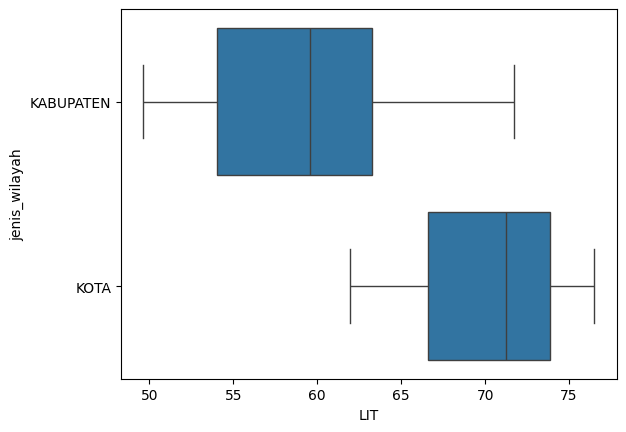

In [95]:
sns.boxplot(
    x = df_merge['LIT'],
    y = df_merge['jenis_wilayah']
)

<Axes: xlabel='NUM', ylabel='jenis_wilayah'>

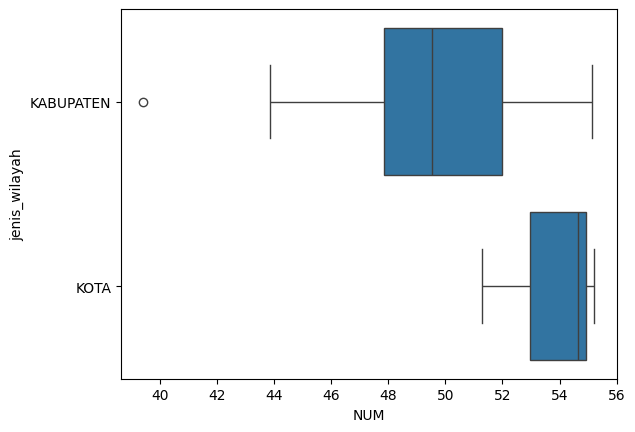

In [96]:
sns.boxplot(
    x = df_merge['NUM'],
    y= df_merge['jenis_wilayah']
)

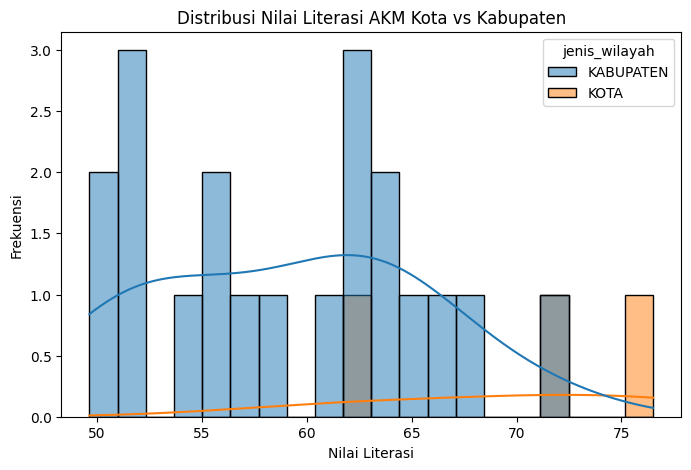

In [97]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_merge, x='LIT', hue='jenis_wilayah', kde=True, bins=20)
plt.title('Distribusi Nilai Literasi AKM Kota vs Kabupaten')
plt.xlabel('Nilai Literasi')
plt.ylabel('Frekuensi')
plt.show()


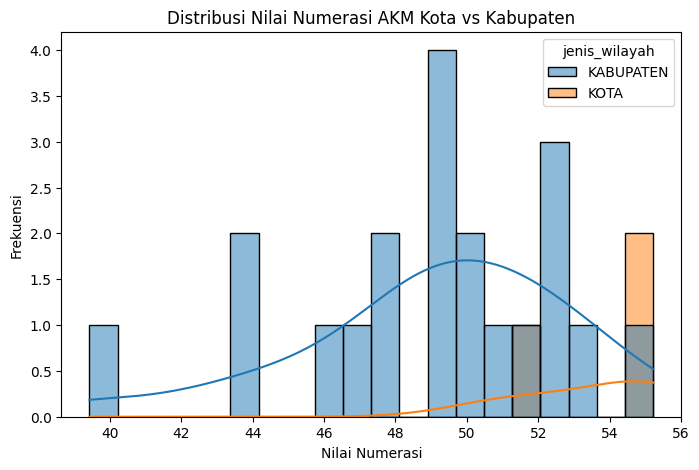

In [98]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_merge, x='NUM', hue='jenis_wilayah', kde=True, bins=20)
plt.title('Distribusi Nilai Numerasi AKM Kota vs Kabupaten')
plt.xlabel('Nilai Numerasi')
plt.ylabel('Frekuensi')
plt.show()


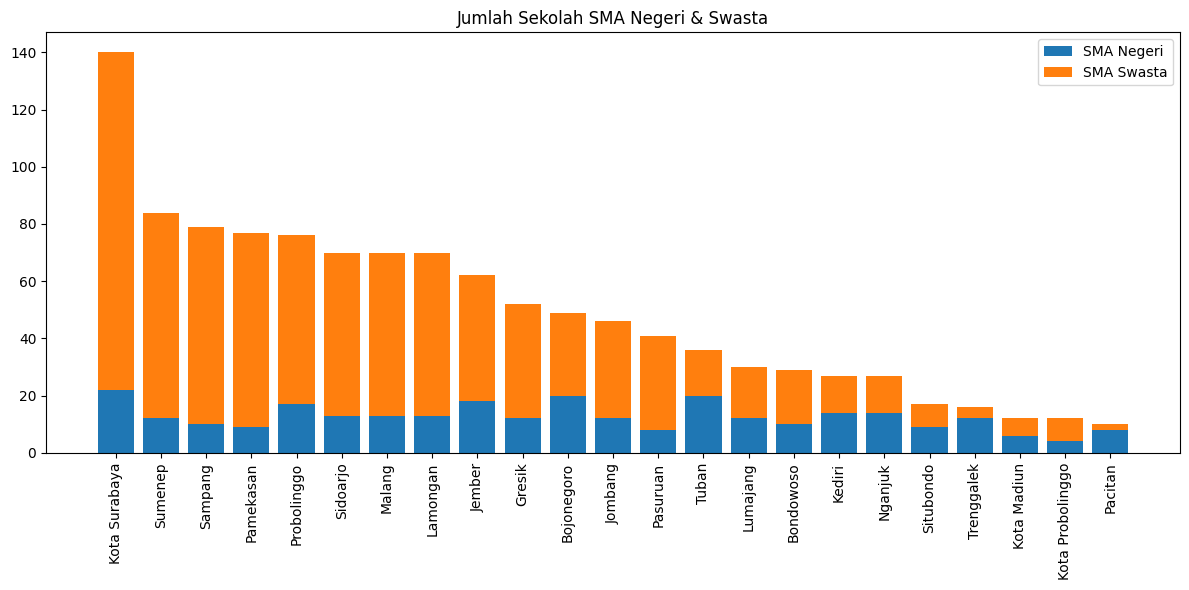

In [118]:
negeri = "Jumlah Sekolah SMA (Negeri)"
swasta = "Jumlah Sekolah SMA (Swasta)"

df = df_merge.copy()
df_sorted = df.sort_values("Jumlah Sekolah SMA (Negeri+Swasta)", ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(df_sorted["Kabupaten/Kota"], df_sorted[negeri], label="SMA Negeri")
plt.bar(df_sorted["Kabupaten/Kota"], df_sorted[swasta],
        bottom=df_sorted[negeri], label="SMA Swasta")

plt.xticks(rotation=90)
plt.title("Jumlah Sekolah SMA Negeri & Swasta")
plt.legend()
plt.tight_layout()
plt.show()


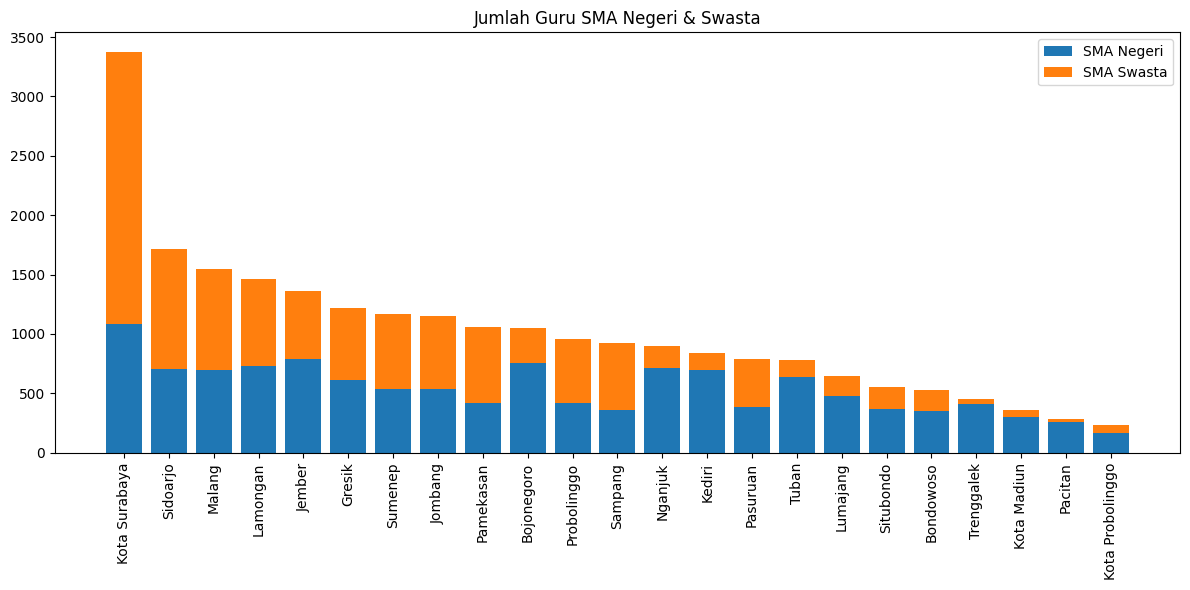

In [117]:
negeri = "Jumlah Guru SMA (Negeri)"
swasta = "Jumlah Guru SMA (Swasta)"

df = df_merge.copy()
df_sorted = df.sort_values("Jumlah Guru SMA (Negeri+Swasta)", ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(df_sorted["Kabupaten/Kota"], df_sorted[negeri], label="SMA Negeri")
plt.bar(df_sorted["Kabupaten/Kota"], df_sorted[swasta],
        bottom=df_sorted[negeri], label="SMA Swasta")

plt.xticks(rotation=90)
plt.title("Jumlah Guru SMA Negeri & Swasta")
plt.legend()
plt.tight_layout()
plt.show()

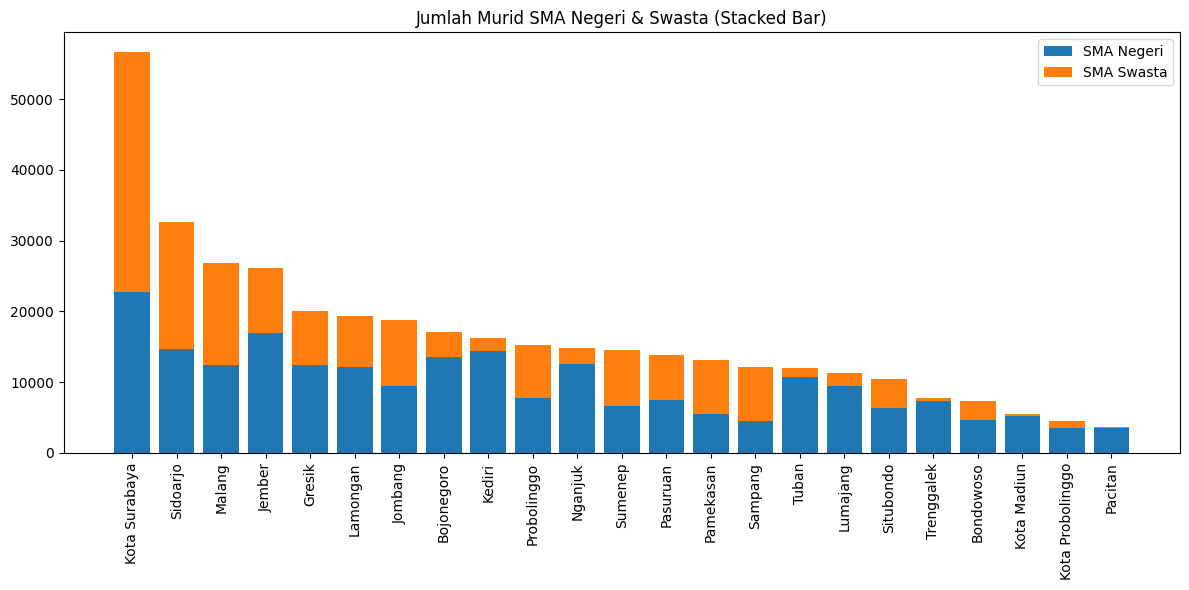

In [116]:
negeri = "Jumlah Murid SMA (Negeri)"
swasta = "Jumlah Murid SMA (Swasta)"

df = df_merge.copy()
df_sorted = df.sort_values("Jumlah Murid SMA (Negeri+Swasta)", ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(df_sorted["Kabupaten/Kota"], df_sorted[negeri], label="SMA Negeri")
plt.bar(df_sorted["Kabupaten/Kota"], df_sorted[swasta],
        bottom=df_sorted[negeri], label="SMA Swasta")

plt.xticks(rotation=90)
plt.title("Jumlah Murid SMA Negeri & Swasta (Stacked Bar)")
plt.legend()
plt.tight_layout()
plt.show()

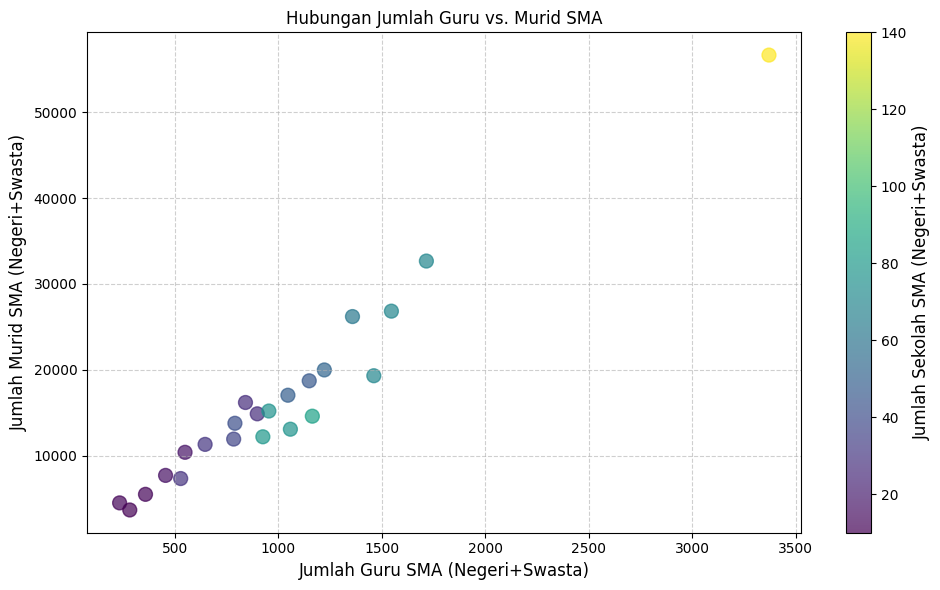

In [121]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    x=df_merge['Jumlah Guru SMA (Negeri+Swasta)'],
    y=df_merge['Jumlah Murid SMA (Negeri+Swasta)'],
    c=df_merge['Jumlah Sekolah SMA (Negeri+Swasta)'],
    cmap='viridis',
    s=100,
    alpha=0.7
)

plt.xlabel('Jumlah Guru SMA (Negeri+Swasta)', fontsize=12)
plt.ylabel('Jumlah Murid SMA (Negeri+Swasta)', fontsize=12)
plt.title('Hubungan Jumlah Guru vs. Murid SMA', )
cbar = plt.colorbar(scatter)
cbar.set_label('Jumlah Sekolah SMA (Negeri+Swasta)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()



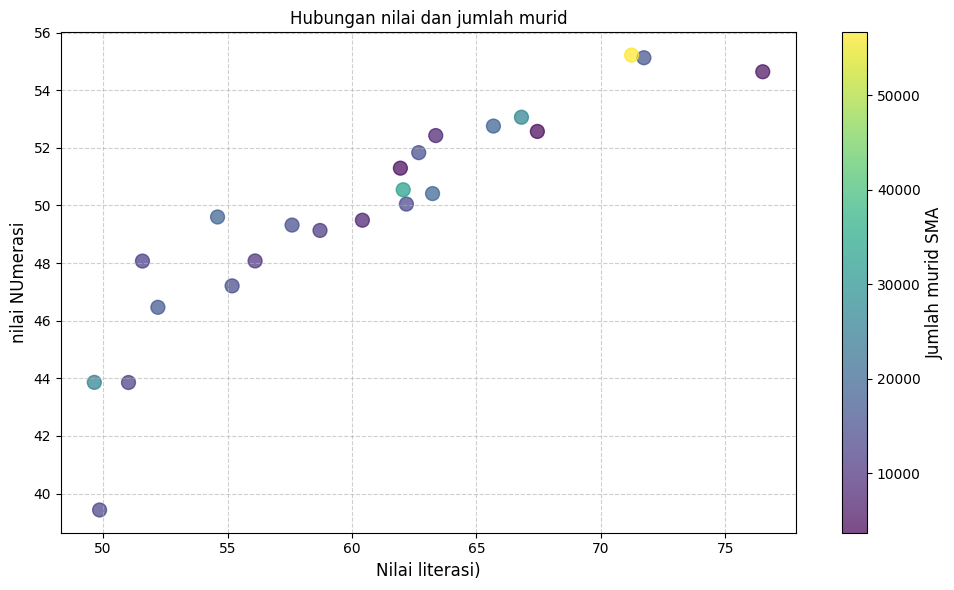

In [125]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    x=df_merge['LIT'],
    y=df_merge['NUM'],
    c=df_merge['Jumlah Murid SMA (Negeri+Swasta)'],
    cmap='viridis',
    s=100,
    alpha=0.7
)

plt.xlabel('Nilai literasi)', fontsize=12)
plt.ylabel('nilai NUmerasi', fontsize=12)
plt.title('Hubungan nilai dan jumlah murid', )
cbar = plt.colorbar(scatter)
cbar.set_label('Jumlah murid SMA', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()



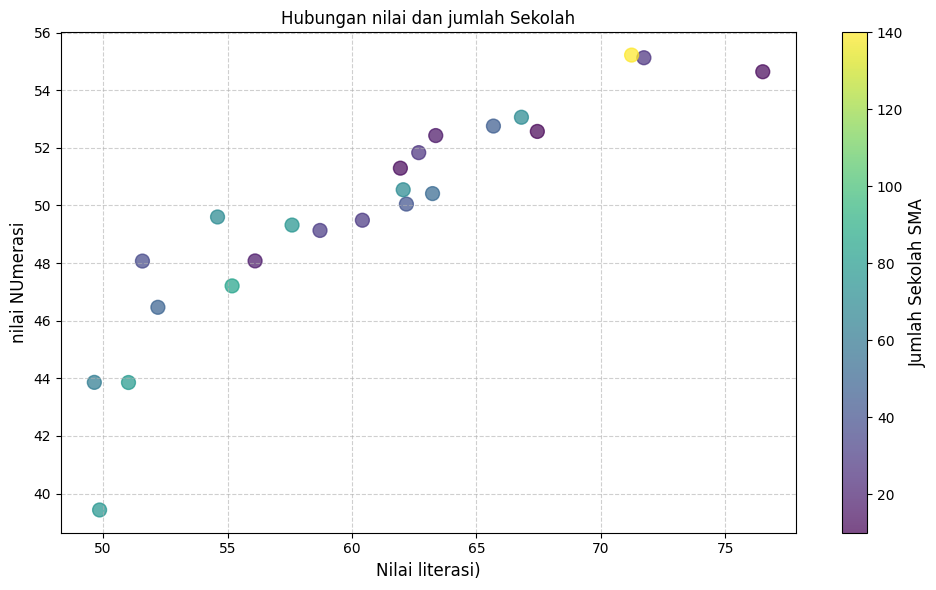

In [127]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    x=df_merge['LIT'],
    y=df_merge['NUM'],
    c=df_merge['Jumlah Sekolah SMA (Negeri+Swasta)'],
    cmap='viridis',
    s=100,
    alpha=0.7
)

plt.xlabel('Nilai literasi)', fontsize=12)
plt.ylabel('nilai NUmerasi', fontsize=12)
plt.title('Hubungan nilai dan jumlah Sekolah', )
cbar = plt.colorbar(scatter)
cbar.set_label('Jumlah Sekolah SMA', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()


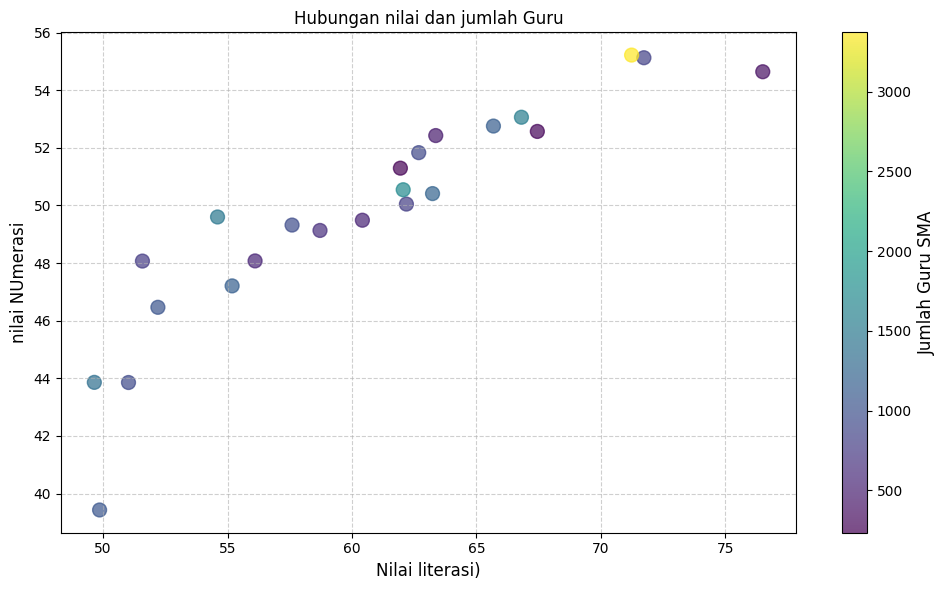

In [128]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    x=df_merge['LIT'],
    y=df_merge['NUM'],
    c=df_merge['Jumlah Guru SMA (Negeri+Swasta)'],
    cmap='viridis',
    s=100,
    alpha=0.7
)

plt.xlabel('Nilai literasi)', fontsize=12)
plt.ylabel('nilai NUmerasi', fontsize=12)
plt.title('Hubungan nilai dan jumlah Guru', )
cbar = plt.colorbar(scatter)
cbar.set_label('Jumlah Guru SMA', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()


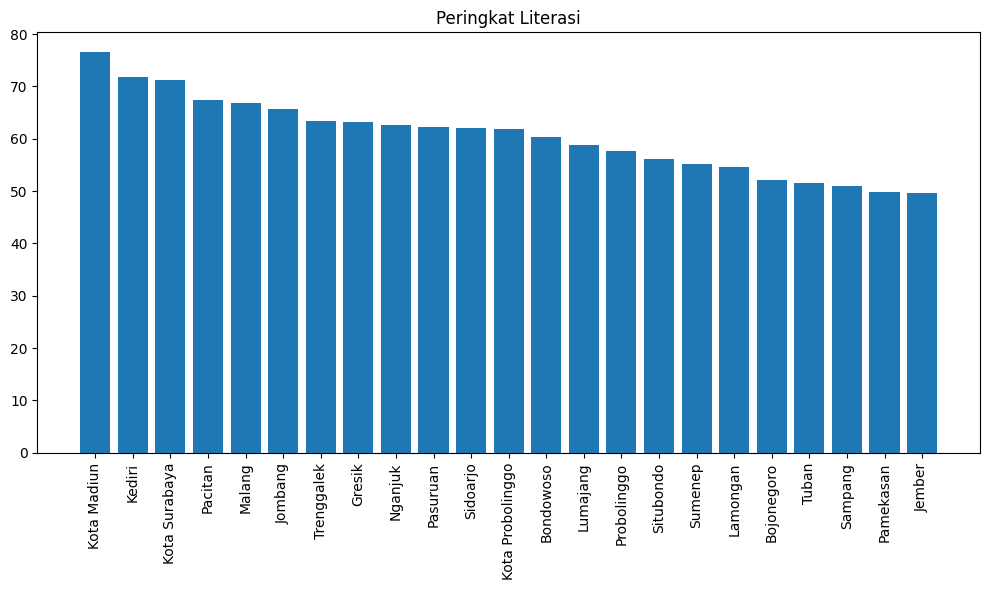

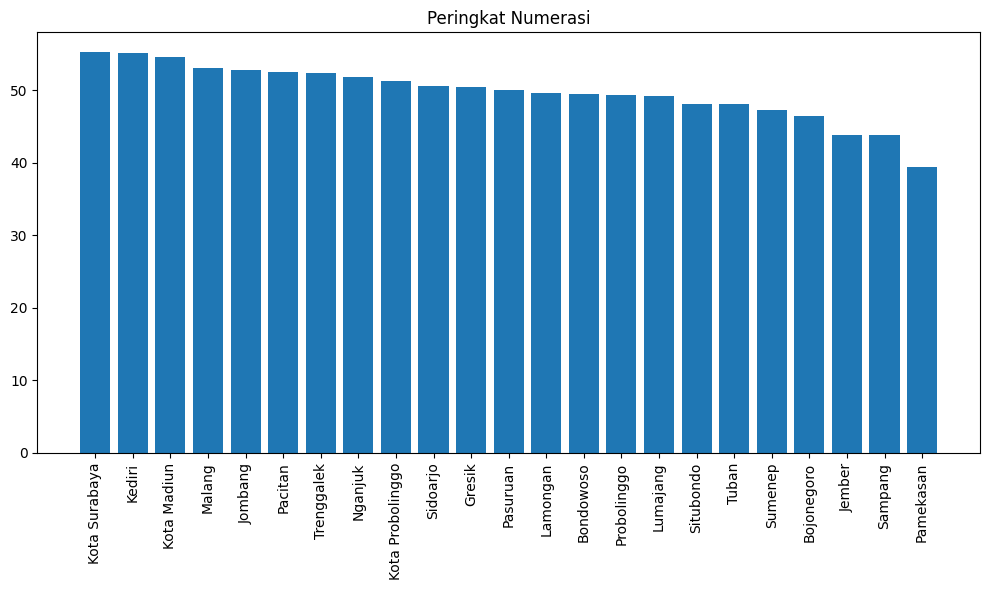

In [106]:
num_rank = df_merge.sort_values("NUM_SCORE", ascending=False)

lit_rank = df_merge.sort_values("LIT", ascending=False)

plt.figure(figsize=(10,6))
plt.bar(lit_rank["Kabupaten/Kota"], lit_rank["LIT"])
plt.xticks(rotation=90)
plt.title("Peringkat Literasi")
plt.tight_layout()
plt.show()



plt.figure(figsize=(10,6))
plt.bar(num_rank["Kabupaten/Kota"], num_rank["NUM"])
plt.xticks(rotation=90)
plt.title("Peringkat Numerasi")
plt.tight_layout()
plt.show()


In [109]:
lit_rank[["Kabupaten/Kota","LIT_SCORE"]]

,Kabupaten/Kota,LIT_SCORE
6,Kota Madiun,76.506709
5,Kediri,71.730147
8,Kota Surabaya,71.235747
13,Pacitan,67.447782
11,Malang,66.808739
4,Jombang,65.683141
21,Trenggalek,63.364891
2,Gresik,63.235964
12,Nganjuk,62.680565
15,Pasuruan,62.185627


In [108]:
num_rank[["Kabupaten/Kota","NUM_SCORE"]]

,Kabupaten/Kota,NUM_SCORE
8,Kota Surabaya,55.217544
5,Kediri,55.125294
6,Kota Madiun,54.639373
11,Malang,53.060402
4,Jombang,52.754220
13,Pacitan,52.567614
21,Trenggalek,52.424719
12,Nganjuk,51.831652
7,Kota Probolinggo,51.292767
18,Sidoarjo,50.544498
